In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
pd.set_option('display.width', 200)


In [2]:
names = 'date bike_count hour temp humidity wind visibility dew_pt_temp radiation rain snow seasons holiday function'.split()
try:
    df = pd.read_csv('data/SeoulBikeData.csv', header=0, names=names)
except UnicodeDecodeError:
    # the problems is the ° of °C
    df = pd.read_csv('data/SeoulBikeData.csv', encoding='latin-1', header=0, names=names)
df.columns

Index(['date', 'bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'seasons', 'holiday', 'function'], dtype='object')

In [3]:
df.shape

(8760, 14)

In [4]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,seasons,holiday,function
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
drop_names = 'date holiday seasons'.split()
df = df.drop(columns=drop_names)
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'function'], dtype='object')

In [6]:
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,function
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [7]:
df['function'] = (df['function'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(columns='hour'.strip())
df.shape

(365, 10)

In [8]:
df

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,function
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


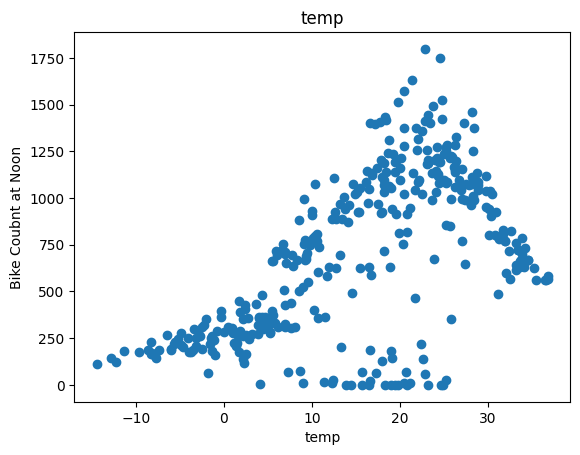

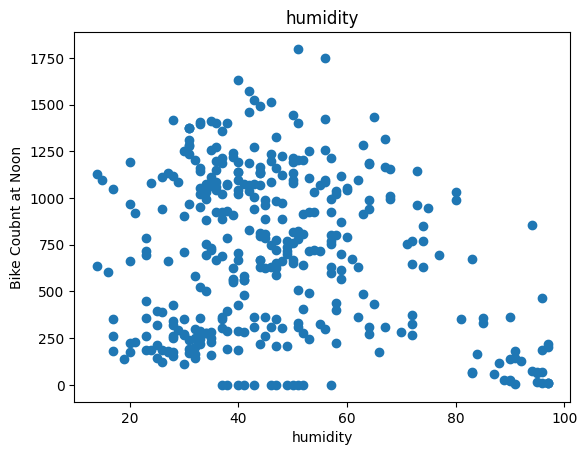

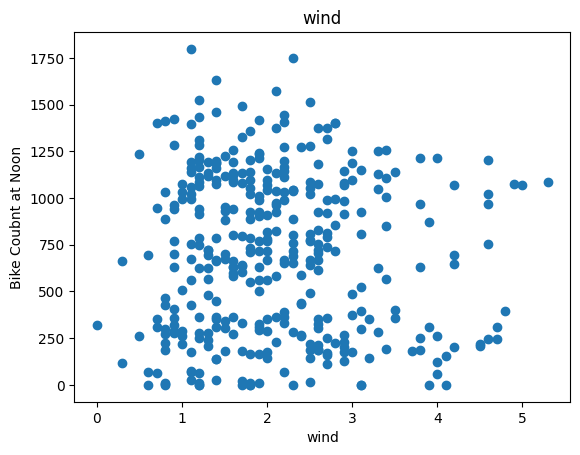

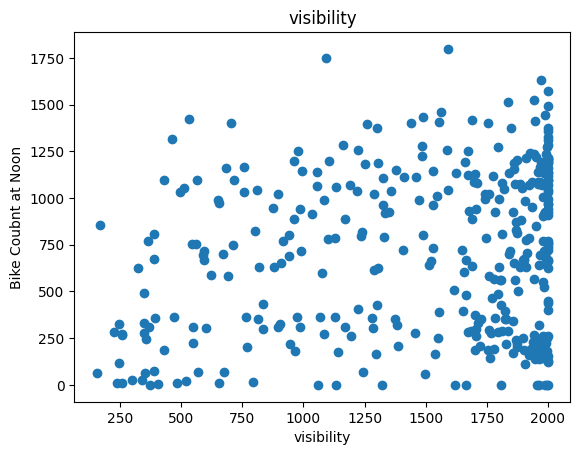

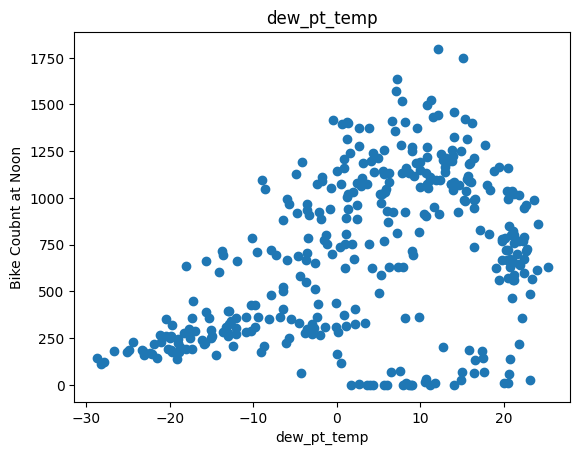

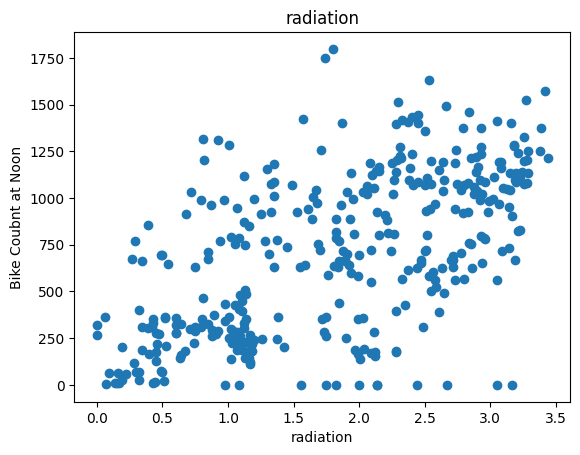

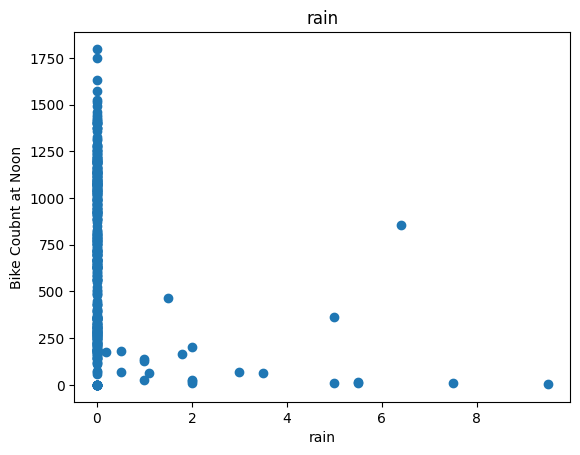

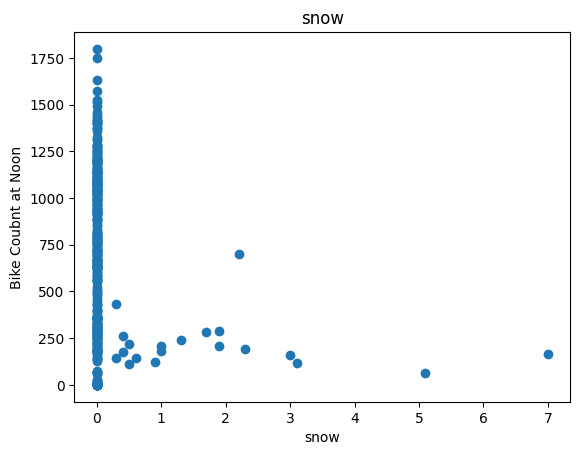

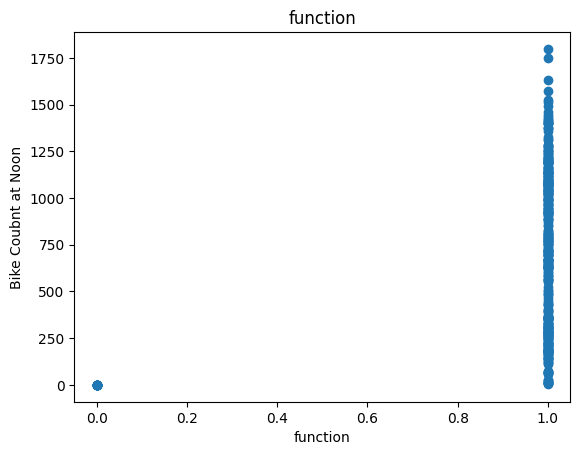

In [9]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Coubnt at Noon')
    plt.xlabel(label)
    plt.show()

In [10]:
df = df.drop(columns='wind visibility function'.split())